<a id="point0"></a>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изучение данных</a></span></li></ul></li><li><span><a href="#Задача-классификация-тональности-текста" data-toc-modified-id="Задача-классификация-тональности-текста-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задача классификация тональности текста</a></span><ul class="toc-item"><li><span><a href="#Метод-TF-IDF" data-toc-modified-id="Метод-TF-IDF-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Метод TF-IDF</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Препроцессинг-данных" data-toc-modified-id="Препроцессинг-данных-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Препроцессинг данных</a></span></li><li><span><a href="#Сборка-пайплайна" data-toc-modified-id="Сборка-пайплайна-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Сборка пайплайна</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Оценка-качества-модели-на-тестовых-данных" data-toc-modified-id="Оценка-качества-модели-на-тестовых-данных-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Оценка качества модели на тестовых данных</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></li><li><span><a href="#Попытка-решения-при-помощи-BERT" data-toc-modified-id="Попытка-решения-при-помощи-BERT-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Попытка решения при помощи BERT</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

**Цель исследования**: Подготовить модели для классификации тональности текста.

**Задачи исследования**: 
1. Ознакомиться с имеющимися в распоряжении данными.
2. Применить метод TF-IDF для создания признаков.
3. Для полученных признаков TF-IDF исследовать модели классификации.
5. Определить лучшую модель удовлетворяющую заданным критериям качества.
7. Представить результат и сделать выводы.

## Загрузка и изучение данных
Импорт необходимых для выполнения проекта библиотек:

In [1]:
import pandas as pd  # Библиотека pandas
import matplotlib.pyplot as plt  # Библиотека для работы с графиками
import numpy as np  # Библиотека NumPy
import re  # Модуль для работы с регулярными выражениями
import hashlib # Модуль хэширования

import spacy # Библиотека для анализа естественного языка (NLP)

from sklearn.feature_extraction.text import TfidfVectorizer # Класс преобразования текста в признаки TF-IDF
from sklearn.model_selection import (train_test_split, # Функция для разбивки датасета на выборки
                                     GridSearchCV)  # Инструмент автоматизированного поиска гиперпараметров
from sklearn.pipeline import Pipeline # Импорт Pipeline
from sklearn.metrics import recall_score, accuracy_score, f1_score # Метрики: recall, accuracy, f1

# Модели МО:
from sklearn.naive_bayes import MultinomialNB # Наивный байесовский классификатор
from sklearn.linear_model import LogisticRegression # Логистическая регрессия
from sklearn.svm import LinearSVC # Линейная SVM
from sklearn.dummy import DummyClassifier # Модель Dummy

Установка вспомогательных настроек, функций и констант:

In [2]:
# формат вывода float-чисел датафрейма:
pd.options.display.float_format = ("{:.2f}".format)

# настройка отображения графиков:
plt.rcParams["figure.figsize"] = (15,7) # размер графиков по умолчанию:
plt.rcParams.update({'axes.grid' : True, 'grid.alpha': 0.33, 'grid.linestyle': '--'}) # отображение сетки:

# переменные для форматирования шрифта при выводе информации:
green, red, bold, end = '\33[92m', '\33[91m', '\33[1m', '\33[0m'

# установка цветовой палитры:
color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
               '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# создание переменной псевдослучайности
RANDOM_STATE = 42

def show_gs_result(data, n=5):
    """
    Показывает 5 лучших по метрике моделей среди результатов GridSearchCV
    """
    result_reg = pd.DataFrame(data.cv_results_).sort_values('rank_test_score')[
    ['rank_test_score', 'param_models', 'mean_test_score','mean_fit_time','params']
    ]
    result_reg['param_models'] = (result_reg['param_models']
                                  .astype('str')
                                  .str.replace('<catboost.*>','CatBoostRegressor', regex=True)
                                  .str.replace('\(.*','', regex=True))
    return result_reg.head(n)

def models_compare(df, threshold_value):
    """
    Визуализация сравнительных характеристик моделей:
    mean_test_score, mean_fit_time
    """
    # Создаем график
    fig, ax1 = plt.subplots()  # Увеличиваем ширину для читаемости
    
    # Настройки для столбцов
    width = 0.15  # Уменьшаем ширину столбцов, чтобы вместить три
    x = range(df.shape[0])  # Позиции по оси X
    
    # Левая ось Y: mean_test_score
    ax1.bar([i - width for i in x], df['mean_test_score'], width, color=color_list[0], label='Средняя метрика')
    ax1.set_xlabel('Наименование моделей')
    ax1.set_ylabel('Метрика F1')
    ax1.tick_params(axis='y')
    ax1.set_xticks(x)
    ax1.set_xticklabels(df['param_models'])
    
    # Правая ось Y: mean_fit_time
    ax2 = ax1.twinx()  # Создаем вторую ось Y
    ax2.bar([i for i in x], df['mean_fit_time'], width, color=color_list[1], label='Среднее время обучения')
    ax2.set_ylabel('Время (секунды)')
    ax2.tick_params(axis='y')
    ax2.set_yscale('log')
    
    # линия порога метрики:
    ax1.axhline(threshold_value, color='r', linestyle='--', label=f"Порог F1={threshold_value}")
    
    # Заголовок и легенда
    plt.title('Сравнительные характеристики моделей')
    fig.legend(loc='upper center', bbox_to_anchor=(0.3, 0.8))  # Увеличиваем ncol до 3
    
    # Показываем график
    plt.tight_layout()
    plt.grid(visible=False)
    plt.show()

[Вернуться к оглавлению](#point0)

### Загрузка данных
Загрузим данные в датафреймы:

In [3]:
data = pd.read_csv('/datasets/toxic_comments.csv')

### Изучение данных
Выведем общую информацию об имеющихся данных:

In [4]:
print('• ' + '\33[4m' + 'Первые 10 строк датасета:' + end)
display(data.head(10))
print('\n• ' + '\33[4m' + 'Основная информация о датасете:' + end)
data.info()

• Первые 10 строк датасета:


,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0
5,5,"""\n\nCongratulations from me as well, use the ...",0
6,6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,7,Your vandalism to the Matt Shirvington article...,0
8,8,Sorry if the word 'nonsense' was offensive to ...,0
9,9,alignment on this subject and which are contra...,0



• Основная информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


Как видно, данные не содержат пропусков. 

Для датасета объемом почти <ins>160 тысяч строк</ins> трудно оценить качество данных. Я попобую выборочно рассмотреть данные основываясь на длине сообщений.

Проверю как распределены длины сообщений:

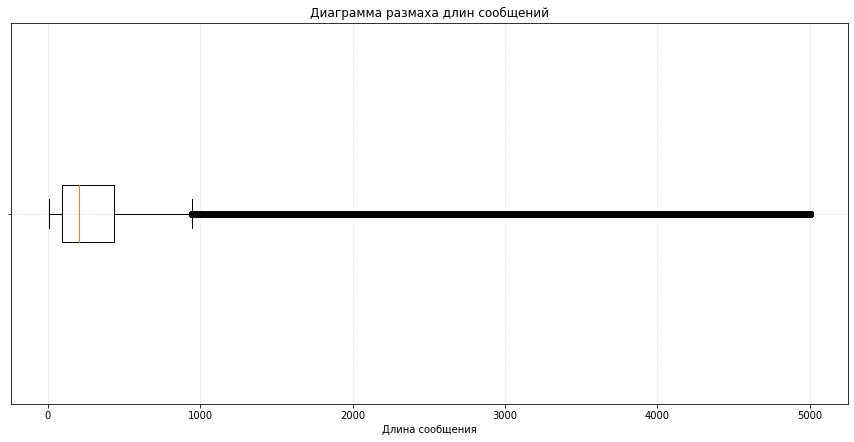

,count,mean,std,min,25%,50%,75%,max,Нижний ус,Верхний ус
0,159292.00,393.69,590.11,5.00,95.00,205.00,435.00,5000.00,5.00,945.00


In [5]:
lengths = data['text'].str.len()

len_boxplot = plt.boxplot(lengths, vert=False, labels=[''])
plt.xlabel("Длина сообщения")
plt.title("Диаграмма размаха длин сообщений")
plt.show()

whiskers = len_boxplot['whiskers']

display(pd.concat([lengths.describe(), 
        pd.DataFrame({'Нижний ус': [whiskers[0].get_xdata()[1]],'Верхний ус':[whiskers[1].get_xdata()[1]]}).T
                  ]).T)

Набор данных содержит сообщения с минимальной длиной 5 символов, максимальной длиной - 5000 и медианной длиной 205 символов.

Выборочно проверю корректность контента. 

10 самых длинных сообщений:

In [6]:
data.sort_values('text', key=lambda x: x.str.len()).tail(10)

,Unnamed: 0,text,toxic
27087,27124,DAMN YOU U CUNT DAMN YOU U CUNT DAMN YOU U CUN...,1
133018,133156,FUCK YOU ALL!! FUCK YOU ALL!! FUCK YOU ALL!!...,1
86382,86463,Wikipedia tEh Free Enyclopedia!!!!!!!!!!!!!!!!...,0
35244,35285,MarxismLONG LIVE ANONYMOUS PHILIPPINESLONG LIV...,0
46480,46535,hahahahahahahahahahahahahahahahahaha vandalism...,1
12869,12884,I OWN THIS PAGE YOU FOOLS!! YOU SHOULD FEAR ME...,1
123354,123463,"LMAO WHAT WEAK THREATS, I HAVENT BEEN BANNED Y...",1
82496,82574,"MUAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHA, YOU C...",1
156158,156317,HUGE FAGGOT HUGE FAGGOT HUGE FAGGOT HUGE FAGGO...,1
72066,72136,China smells like fart. China smells like fart...,1


10 сообщений с медианной длиной:

In [7]:
data[data['text'].str.len() == lengths.describe()['50%']].sort_values('text', key=lambda x: x.str.len()).head(10)

,Unnamed: 0,text,toxic
395,395,RfC\n\nYou pretty much blew through my respect...,0
99764,99861,"""\nNo, but do you have any sourced, factual ev...",0
99880,99977,"]] Welcome to Wikipedia, Juhko! I have been e...",0
101341,101438,"Actually, that link is to an anonymous website...",0
103295,103392,"Oh, and this revert just sums up the dedicatio...",0
103659,103756,Leo Strauss\n\nNothing about Leo Strauss under...,0
104041,104138,The British army employs 113 thousand regular ...,0
104118,104215,"As I understood it, the usual procedure is to ...",0
104363,104460,"Regarding Sunil Grover (Actor) Page \n\nHi, Th...",0
105192,105289,"User talk:122.106.69.62|, as you did at User t...",0


10 самых коротких сообщений:

In [8]:
data.sort_values('text', key=lambda x: x.str.len()).head(10)

,Unnamed: 0,text,toxic
119018,119123,"""""""",1
137400,137547,"== """"""",0
52336,52393,"14:53,",0
136820,136958,~ J.Lo,0
15432,15449,"Howdy!""",0
120868,120973,you suck,1
109794,109891,{{unbloc,0
118650,118750,FUCK YOU,1
150648,150804,"04:59, 22 Au",0
93421,93513,{{unblock|yo,0


В целом данные выглядят реалистично и уникально. 

Из списка коротких сообщений обращает на себя внимание строка с индексом 119018, где содержится текст `'  """'`, которая отмечена как токсичная. Не критично, но мне кажется, такую строку следует исключить:

In [9]:
data.drop(119018, inplace=True)

Проверим, есть ли полные дубли строк:

In [10]:
data.duplicated().sum()

0

А также дубли в признаке `text`:

In [11]:
data.duplicated(subset=['text']).sum()

0

Проверим баланс классов в целевом признаке:

In [12]:
data['toxic'].value_counts(normalize=True)

0   0.90
1   0.10
Name: toxic, dtype: float64

**Вывод**:
* Датасет состоит из 159292 строк и 3 столбцов.
* Данные представлены следующими признаками:
  * `Unnamed: 0` - /описание этого признака отсутствует/;
  * `text` - текст комментария;
  * `toxic` - токсичность комментария.
* Признак `text` содержит сообщения на английском языке.
* Признак `toxic` распределен в примерном соотношении `0`: 90%, `1`: 10%
* Данные не содержат пропусков.
* Данные не содержат полных дубликатов строк и дубликатов в признаке `text`.
* Имеющиеся данные соответствуют описанию и структуре, заявленным заказчиком.
* Значения ячеек выглядят реалистично.
* Значения ячеек выглядят уникально.

[Вернуться к оглавлению](#point0)

## Задача классификация тональности текста
На основе признака `text` и целевого признака `toxic` необходимо построить модель для классификации текстов.
### Метод TF-IDF
#### Подготовка данных
Зададим переменные с обучающими и целевым признаками и отобразим их форму:

In [13]:
X = data['text']
y = data['toxic']

X.shape, y.shape

((159291,), (159291,))

Разобъем данные на обучающую и тестовую выборки с использованием следующих параметров:
* `test_size=0.25` - Размер тестовой выборки равен 25% от исходных данных.
* `random_state = RANDOM_STATE` - фиксация псевдослучайности алгоримта разбиения
* `stratify = y` - для повышения точности характера распределения целевого признака в обучающей и тестовой выборки я использую стратификацию.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.25,
    random_state = RANDOM_STATE,
    stratify = y
)

# отображение размерности получившихся выборок:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((119468,), (119468,)), ((39823,), (39823,)))

Проверим характер распределения целевого признака после разбиения:

In [15]:
pd.DataFrame({'full' :y.value_counts(normalize=True),
              'train':y_train.value_counts(normalize=True),
              'test' :y_test.value_counts(normalize=True),
             })

,full,train,test
0,0.90,0.90,0.90
1,0.10,0.10,0.10


Соотношение значений целевого признака для созданных выборок сохранено.

**Вывод**:
* Сформированы переменные содержащие обучающие и целевой признаки.
* Данные разбиты на обучающие и тестовые выборки в пропорции в пропорции: <span style="border-width:2px; border-style:solid; border-color:#ddb62b; padding: 3px;">75% {обучающая}</span> + <span style="border-width:2px; border-style:solid; border-color:#d160c4; padding: 3px;">25% {тестовая}</span>.
* Для сохранения характера распределения целевого признака использована стратификация.



[Вернуться к оглавлению](#point0)

#### Препроцессинг данных
Чтобы алгоритмы умели определять тематику и тональность текста, их нужно обучить на корпусе. Это набор текстов, в котором эмоции и ключевые слова уже размечены.

Произведем лемматизацию и очистку текста.

В теории курса, при классификации русского текста, данная процедура осуществлялась с помощью двух раздельных функций `lemmatize` и `clear_text`:
<blockquote>
<code>def lemmatize(text):
   m = Mystem()
   lemm_list = m.lemmatize(text)
   lemm_text = "".join(lemm_list)     
   return lemm_text

def clear_text(text):   
   text = re.sub(r'[^a-zA-Z ]', ' ', text)
   text = " ".join(text.split())
   return text</code>
</blockquote>

Возьмем эти функции за основу и преобразуем их для работы с английским текстом.
1. В качестве инструмента лемматизации текста я буду использовать библиотеку **SpaCy**.

Загрузим модель:
* `'en_core_web_sm'` - обозначение модели для английского языка из библиотеки SpaCy, предназначенной для анализа естественного языка (NLP)
* `_sm` - обозначение размера библиотеки: 'small' / маленький
* `disable=['ner', 'parser']` - по умолчанию `en_core_web_sm` включает компоненты `tagger`, `parser`, `ner` - два последних не нужны для лемматизации, но замедляют обработку, поэтому отключим их.



In [16]:
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

2. Для предварительной очистки текста от нежелательных символов я буду использовать алгоритм вышеупомянутой функции `clear_text`, но проведу его векторно с помощью встроенных функций pandas - так получается быстрее:   
`corpus.str.replace(r'[^a-zA-Z ]', ' ', regex=True).str.split().str.join(' ')`
3. Лемматизацию текста я буду осуществлять методом батчей - `nlp.pipe()` обрабатывает тексты батчами (например, по 1000 строк), а не по одному, что значительно ускоряет процедуру на больших корпусах.

Таким образом формируется функция для лемматизации:

In [17]:
def lemmatize(corpus, batch_size=1000):
    """
    Функция для очистки и лемматизации текста.
    В качестве corpus ожидает объект pd.Series
    """
    # Предварительная очистка текста:
    corpus_cleaned = corpus.str.replace(r'[^a-zA-Z ]', ' ', regex=True).str.split().str.join(' ')
    
    # Батчевая лемматизация
    lemmatized_texts = [' '.join(token.lemma_ for token in doc) for doc in nlp.pipe(corpus_cleaned, 
                                                                                    batch_size=batch_size)]
    return lemmatized_texts

Проверим корректность работы функции на простом примере:

In [18]:
sentence1 = "The striped bats; are; #hanging on their feet for best"
sentence2 = "you... should be$ ashamed of yourself went worked"
df_test = pd.DataFrame([sentence1, sentence2], columns = ['text'])

pd.DataFrame({
    'Исходный текст':df_test['text'],
    'Очищенный и лемматизированный текст':lemmatize(df_test['text'])
             }).T.style

,0,1
Исходный текст,The striped bats; are; #hanging on their feet for best,you... should be$ ashamed of yourself went worked
Очищенный и лемматизированный текст,the stripe bat be hang on their foot for good,you should be ashamed of yourself go work


Функция работает корректно. Можно применять к данным.

Лемматизируем текст для обучающей выборки:

In [19]:
%%time
lemmatize_train = lemmatize(X_train)

CPU times: user 6min 17s, sys: 7.26 s, total: 6min 25s
Wall time: 6min 25s


И для тестовой выборки:

In [20]:
%%time
lemmatize_test = lemmatize(X_test)

CPU times: user 2min 1s, sys: 1.9 s, total: 2min 3s
Wall time: 2min 3s


Проверим корректность обработки наших данных:

In [21]:
display(pd.DataFrame({
    'Исходный текст':[X_train.iloc[0]],
    'Очищенный и лемматизированный текст':[lemmatize_train[0]],
             }, index=['']).T.style.set_caption('Train-выборка'))

display(pd.DataFrame({
    'Исходный текст':[X_test.iloc[0]],
    'Очищенный и лемматизированный текст':[lemmatize_test[0]]
             }, index=['']).T.style.set_caption('Test-выборка'))

,
Исходный текст,""" RefBot was approved as exclusion-compliant. You should be able to add to your talk page to stop it editing there. If this isn't successful, the bot may be blocked for not adhering to it's approved terms. –xenotalk """
Очищенный и лемматизированный текст,RefBot be approve as exclusion compliant you should be able to add to your talk page to stop it edit there if this isn t successful the bot may be block for not adhere to it s approve term xenotalk


,
Исходный текст,""" (UTC) Please change """"irish-born British"""" to """"irish"""" or to """"irish who worked mainly in London"""" because of the following; The says he was born AND grew up in Ireland apart from a stint in London during WW1. He then went travelling in 1926/1928 to London, Berlin, Paris and back to London. Also, when Francis was born in Ireland under British rule he would be British by his passport and then he would be automatically Irish by 1922 and could later reclaim his British nationality which there is no evidence that he did. So he's irish until proven otherwise. Further to that it threatens the credibility of Wikipedia if a survey of people decide he is British because they think so. Someone's nationality cannot decided by concensus which is whats happening here. Ignoring the above facts above would be more than disappointing but also from what we KNOW it it is incorrect and an injustice to be so arbitrary. 109.78.211.58 14:05, 11 August 2013"""
Очищенный и лемматизированный текст,UTC please change irish bear British to irish or to irish who work mainly in London because of the follow the say he be bear and grow up in Ireland apart from a stint in London during WW he then go travel in to London Berlin Paris and back to London also when Francis be bear in Ireland under british rule he would be british by his passport and then he would be automatically irish by and could later reclaim his british nationality which there be no evidence that he do so he s irish until prove otherwise far to that it threaten the credibility of Wikipedia if a survey of people decide he be british because they think so someone s nationality can not decide by concensus which be what s happen here ignore the above fact above would be more than disappointing but also from what we know it it be incorrect and an injustice to be so arbitrary August


Данные обработаны корректно.

Для оптимизации процесса удалим из текста слова без смысловой нагрузки (стоп-слова). <s>Это можно сделать при помощи пакета `stopwords`, который находится в модуле `nltk.corpus` библиотеки `nltk`.</s> Это можно сделать при помощи пакета `stopwords`, который находится в модуле `Defaults.stop_words` библиотеки `SpaCy`.

Загрузим список стоп-слов для английского языка:

In [22]:
stopwords = list(nlp.Defaults.stop_words)

<div style="border:solid orange 2px; padding: 20px">На этапе кросс-валидации <code>TfidfVectorizer</code> выдавал предупреждение при использовании стандратного списка стоп-слов: <font color='red'>Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.</font>, поэтому я расширил список стоп-слов:

In [23]:
extra_stopwords = ['ll', 've', 't', 'd', 's', 'm']  # Часто встречающиеся сокращения
stopwords_extended = stopwords + extra_stopwords

Величина **TF-IDF** (от англ. *term frequency*, «частота терма, или слова»; *inverse document frequency*, «обратная частота документа, или текста») используется для оценка важности слова. То есть TF отвечает за количество упоминаний слова в отдельном тексте, а IDF отражает частоту его употребления во всём корпусе.

Формула TF-IDF: $TFIDF=TF*IDF$

TF определяется по формуле $TF=\frac{t}{n}$, где $t$ (от англ. *term*) — количество употребления слова, а $n$ — общее число слов в тексте.

IDF нужна в формуле, чтобы уменьшить вес слов, наиболее распространённых в любом другом тексте заданного корпуса. IDF зависит от общего числа текстов в корпусе ($D$) и количества текстов, в которых это слово встречается ($d$).  
$IDF=\log_{10}\lgroup\frac{D}{d}\rgroup$

Рассчитать TF-IDF можно с помощью библиотеки `sklearn`. Класс `TfidfVectorizer()` находится в модуле `sklearn.feature_extraction.text`.

⚠️ TF-IDF для корпуса текстов будет рассчитан на этапе кросс-валидации.

**Вывод**: для обучающей и тестовой выборки произведена очистка и лемматизация текста.

[Вернуться к оглавлению](#point0)

#### Сборка пайплайна
Поиск лучшей модели для корпуса текстов представленном в виде признаков TF-IDF я произведу с помощью пайплайна.

Создадим итоговый пайплайн:
* `tfidf` - на данном этапе включаем в пайплан счётчик TF-IDF, указав для него список стоп-слов `stopwords_extended`
* в качестве модели по умолчанию LogisticRegression:

In [24]:
pipe_final = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords_extended)),  # Добавляем шаг векторизации
    ('models', LogisticRegression(random_state=RANDOM_STATE))  # Модель как второй шаг
])

Создание сетки, содержающую набор моделей и их гиперпараметров. 

Исследуются модели:

Название модели|Гиперпараметры
-|:-
LogisticRegression|C: [0.1, 12.7]
LinearSVC|C: [1.038, 0.1]
MultinomialNB|alpha: [0.0187, 0.1]

Выбор моделей главным образом обусловлен их способностью быстро работать с большими матрицами признаков.

LogisticRegression и LinearSVC - две [линейные модели](https://scikit-learn.ru/stable/modules/linear_model.html), которые используют разные алгоритмы:
* Логистическая регрессия минимизирует логарифмическую потерю (log-loss) с добавлением регуляризации.
* Линейная SVM минимизирует hinge loss (шарнирную потерю) с L2-регуляризацией.

MultinomialNB ([наивный байесовский классификатор](https://scikit-learn.ru/stable/modules/naive_bayes.html)):
* Специально разработан для задач обработки текста с TF-IDF или частотными признаками.
* Очень быстр в обучении и предсказании.
* Хорошо работает с разреженными матрицами.
* Подходит для бинарной и многоклассовой классификации.

<div style="border:solid orange 2px; padding: 20px"><font color='red'>*</font> <i>Примечание</i>: оптимальные значения гиперпаметров моделей получены с помощью инструмента <b>Optuna</b>. Для финальной сетки оставил небольшое число вариаций с целью продемонстрировать лучший достигнутый результат и сократить время на обучение моделей.

In [25]:
param_grid = [
    
    # словарь для модели LogisticRegression
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            max_iter=1000,
            solver='lbfgs'
        )],
        'models__C': [0.1, 12.7],
    },
    
    # словарь для модели LinearSVC
    {
        'models': [LinearSVC(random_state=RANDOM_STATE, max_iter=1000, dual=True, tol=0.0006)], 
        'models__C': [1.038, 0.1],

    },
    
    # словарь для модели MultinomialNB
    {
        'models': [MultinomialNB(fit_prior=True)], 
        'models__alpha': [0.0187, 0.1],
        
    }
]

Создаем пайплайн с применением автоматизированного поиска гиперпараметров **GridSearchCV** со следующими параметрами:
* Установка модели пайплайна по умолчанию `pipe_final`.
* Применение заданной сетки гиперпараметров моделей `param_grid`.
* `cv=5` - применяется кросс-валидация из 5 блоков
* `scoring='f1'` - в качестве метрики качества моделей используется **F1-мера** - это **задано условием**. F1-мера используется для оценки модели по числу ошибок обоих родов. Она агрегирует значения $precision$ и $recall$ в единый показатель качества модели. Метрика F1 определяется исходя из равнозначности $precision$ и $recall$ и рассчитывается по формуле: $F1 = 2*\frac{precision * recall}{precision + recall}$. F1 - это среднее гармоническое между $precision$ и $recall$, его значение лежит в диапазоне [0,1]. F1 достигает максимального значения, когда исходные метрики равны единице. Если хотя бы одна из исходных метрик близка к нулю, то и F1 тоже стремится к нулю. 
* `n_jobs=-1` - количество вычислительных мощностей (чтобы считалось быстрее, указывают `-1`)
* `verbose=5` - опция логирования процесса поиска, например:
  * 0: Без вывода.
  * 1: Краткий прогресс.
  * 2+: Подробный прогресс по каждому фолду и кандидату.

In [26]:
grid_search = GridSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

**Вывод**: сформирован пайплайн с применением автоматизированного поиска гиперпараметров **GridSearchCV**

[Вернуться к оглавлению](#point0)

#### Обучение моделей
Запускаем пайплайн на тренировочных данных:

In [27]:
grid_search.fit(lemmatize_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words=['afterwards',
                                                                    'should',
                                                                    'within',
                                                                    'whereafter',
                                                                    'most',
                                                                    'which',
                                                                    '‘s', 'put',
                                                                    'thereby',
                                                                    'a', 'part',
                                                                    'both',
                                                                    'thus',
                                                                  

Отобразим лучшие результаты:

In [28]:
result = show_gs_result(grid_search, 10)
result.style

,rank_test_score,param_models,mean_test_score,mean_fit_time,params
2,1,LinearSVC,0.777895,3.900473,"{'models': LinearSVC(C=1.038, random_state=42, tol=0.0006), 'models__C': 1.038}"
1,2,LogisticRegression,0.772817,90.959518,"{'models': LogisticRegression(max_iter=1000, random_state=42), 'models__C': 12.7}"
3,3,LinearSVC,0.733011,3.647742,"{'models': LinearSVC(C=1.038, random_state=42, tol=0.0006), 'models__C': 0.1}"
4,4,MultinomialNB,0.670893,3.449346,"{'models': MultinomialNB(), 'models__alpha': 0.0187}"
5,5,MultinomialNB,0.638545,3.443414,"{'models': MultinomialNB(), 'models__alpha': 0.1}"
0,6,LogisticRegression,0.490044,21.255009,"{'models': LogisticRegression(max_iter=1000, random_state=42), 'models__C': 0.1}"


Отобразим лучшие результаты исследуемых наименований моделей:

In [29]:
best_scores = (result.loc[result.groupby('param_models')['mean_test_score'].idxmax()]
               .sort_values(by='rank_test_score'))
best_scores.style

,rank_test_score,param_models,mean_test_score,mean_fit_time,params
2,1,LinearSVC,0.777895,3.900473,"{'models': LinearSVC(C=1.038, random_state=42, tol=0.0006), 'models__C': 1.038}"
1,2,LogisticRegression,0.772817,90.959518,"{'models': LogisticRegression(max_iter=1000, random_state=42), 'models__C': 12.7}"
4,4,MultinomialNB,0.670893,3.449346,"{'models': MultinomialNB(), 'models__alpha': 0.0187}"


Отобразим характеристики с помощью графиков.

<div style="border:solid orange 2px; padding: 20px"><font color='red'>*</font> <i>Примечание</i>: шкала времени - логарифмическая!

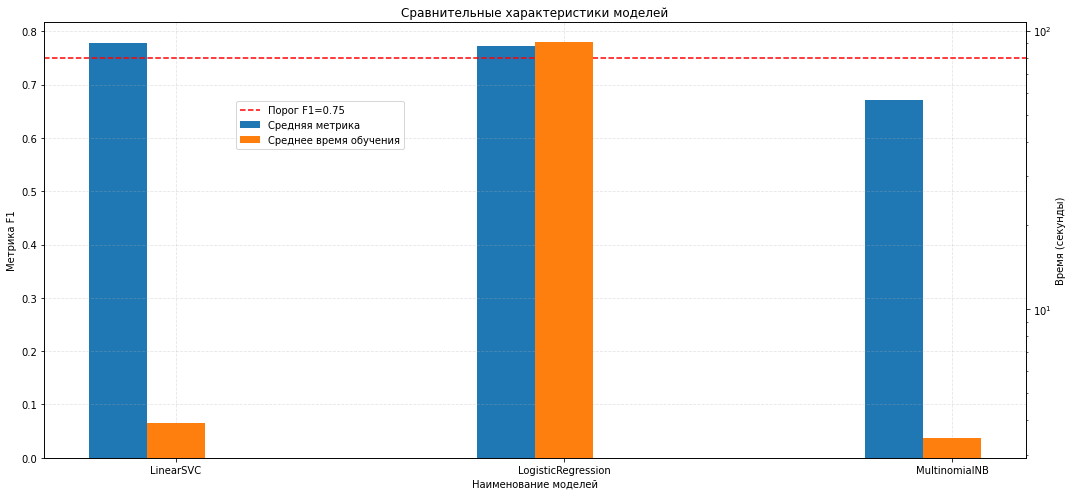

In [30]:
models_compare(best_scores, 0.75)

**Вывод**:
* Из трех наименований моделей лишь две смогли преодалеть порог метрики F1=0.75, это линейные модели LinearSVC и LogisticRegression.
* Модель LinearSVC показала лучшую метрику качества - F1=0.777895 на кросс-валидации.
* Модель LogisticRegression лишь немного отступает по качеству - F1=0.772817.
* Вместе с тем, LinearSVC обучается более чем в 20 раз быстрее чем LogisticRegression.
* Для модели MultinomialNB не удалось подобрать такие гиперпараметры, при которых она могла бы достичь заданного порога точности.
* Добавление векторизации текста TfidfVectorizer на этапе кросс-валидации ощутимо увеличивает время обучения:
  * для LinearSVC время увеличилось примерно в 20 раз
  * для MultinomialNB - в 80 раз
  * для LogisticRegression - существенно не изменилось.
* По совокупности характеристик, лучшая из исследуемых моделей - **LinearSVC**.

Зададим переменную содержащую информацию о лучшей модели:

In [31]:
best_model = grid_search.best_estimator_

[Вернуться к оглавлению](#point0)

#### Оценка качества модели на тестовых данных
Рассчитаем метрики лучшей модели на тестовых данных:

In [32]:
y_test_pred = best_model.predict(lemmatize_test)
f1_test = f1_score(y_test, y_test_pred)
print(f'Метрика Accuracy: {accuracy_score(y_test, y_test_pred):.3f}')
print(f'Метрика Recall: {recall_score(y_test, y_test_pred):.3f}')
print(f'Метрика F1: {f1_test:.3f}')

Метрика Accuracy: 0.959
Метрика Recall: 0.698
Метрика F1: 0.777


**Вывод**:
* Модель **LinearSVC** показала метрику F1=0.777 на тестовой выборке, что соотвествует заданному порогу (F1≥0.75).
* Метрики Accuracy и Recall соответственно равны 0.959 и 0.698.

[Вернуться к оглавлению](#point0)

#### Проверка модели на адекватность
Для проверки модели на адекватность я использую модель **DummyRegressor** из библиотеки `sklearn`. Данная модель формирует предсказания на простом принципе - заполняя значения какой-либо постоянной величиной - в нашем случае самым популярным значением `strategy="most_frequent"`.

In [33]:
# инициализация модели:
dummy = DummyClassifier(strategy="most_frequent")

# обучение модели на train-выборке:
dummy.fit(lemmatize_train, y_train)

# формирование предсказаний на основе признаков test-выборки:
dummy_predictions_test = dummy.predict(lemmatize_test)

# расчет метрики:
f1_dummy = f1_score(y_test, dummy_predictions_test)

print(f'Метрика Accuracy: {accuracy_score(y_test, dummy_predictions_test):.3f}')
print(f'Метрика Recall: {recall_score(y_test, dummy_predictions_test):.3f}')
print(f'Метрика F1: {f1_dummy:.3f}')

# оценка результата:
if f1_test > f1_dummy:
    print("✅ Модель прошла проверку на адекватность:",
          f"метрика '{grid_search.best_estimator_.steps[-1][1].__class__.__name__}' ({f1_test:.2f})",
          f"выше, чем у случайной ({f1_dummy})")
else:
    print("Модель нуждается в доработке: метрика качества низкая 👎")

Метрика Accuracy: 0.898
Метрика Recall: 0.000
Метрика F1: 0.000
✅ Модель прошла проверку на адекватность: метрика 'LinearSVC' (0.78) выше, чем у случайной (0.0)


**Вывод**: 
* Модель LinearSVC прошла проверку на адекватность.
* Высокая метрика Accuracy не всегда говорит о качестве модели - в нашем случае 'простая' модель получила 0.898 баллов "аккуратности".

[Вернуться к оглавлению](#point0)

### Попытка решения при помощи BERT

BERT (от англ. Bidirectional Encoder Representations from Transformers, «двунаправленная нейронная сеть-кодировщик») — нейронная сеть для создания модели языка. Её разработали в компании Google, чтобы повысить релевантность результатов поиска. Этот алгоритм понимает контекст запросов, а не просто анализирует фразы. Для машинного обучения она ценна тем, что помогает строить векторные представления. Причём в анализе текстов применяют уже предобученную на большом корпусе модель.

Обучение модели BERT довольно ресурсозатратное, поэтому для решения задачи я рассмотрю сэмпл данных размером 6000 строк:

In [34]:
data_sample = data.sample(n=6000, random_state=42).reset_index(drop=True)
data_sample.shape

(6000, 3)

Создание переменных для обучающего и целевого признака:

In [35]:
X_sample = data_sample['text']
y_sample = data_sample['toxic']

# отображение формы признаков:
X_sample.shape, y_sample.shape

((6000,), (6000,))

Разбивка данных на обучающую и тестовую выборку.

In [36]:
TEST_SIZE = 0.25

X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
       X_sample,
       y_sample,
       test_size = TEST_SIZE,
       random_state = RANDOM_STATE,
       stratify = y_sample)

print(f"X_train.shape: {X_train_sample.shape}; y_train.shape: {y_train_sample.shape}")
print(f"X_test.shape: {X_test_sample.shape}; y_test.shape: {y_test_sample.shape}")

X_train.shape: (4500,); y_train.shape: (4500,)
X_test.shape: (1500,); y_test.shape: (1500,)


<div style="border:solid orange 2px; padding: 20px">
Для ускорения процесса далее я пропущу выполнение кода с подготовкой данных. Код запускался в <a href="https://colab.research.google.com/drive/1nGPLnDKSwL8fpoJAc7UoBD46GxnoQmeH?usp=sharing">Google Colab файле</a>, с ним также можно ознакомиться при желании.

Токенизация текста:
* Инициализируем токенизатор как объект класса `BertTokenizer()`. Передадим ему аргумент `toxic-bert` — это наименование словаря для модели, который будет автоматически подгружен.
* Применение токенизатора для X_sample:
  * `add_special_tokens=True` - значит, что к любому преобразуемому тексту добавляется токен начала (101) и токен конца текста (102).
  * `max_length=512` - модель BERT ожидает, что входные тензоры (batch и attention_mask) имеют фиксированную длину последовательности, которая соответствует максимальной длине, заданной в конфигурации модели (обычно 512 токенов для bert-base). 
  * `truncation=True` - обрезает текст, если он длиннее 512 токенов.
  * `padding='max_length'` - выравнивание длин векторов по максимальному значению. В теории курса это осуществлялось с помощью такого кода: `padded = np.array(vector + [0]*(n - len(vector)))`





<pre style="background-color: #f4f4f4; border: 1px solid #ccc; padding: 10px; font-family: monospace; white-space: pre-wrap; word-wrap: break-word;">
tokenizer = transformers.BertTokenizer.from_pretrained('toxic-bert')

# Токенизация с усечением до 512 токенов
tokenized = X_sample.apply(
    lambda x: tokenizer.encode(
        x,
        add_special_tokens=True,
        max_length=512,
        truncation=True,
        padding='max_length'
    )
</pre>

Поскольку выравнивание длин векторов было осуществлено на предыдущем шаге, далее просто преобразуем в формат `np.array`:

<pre style="background-color: #f4f4f4; border: 1px solid #ccc; padding: 10px; font-family: monospace; white-space: pre-wrap; word-wrap: break-word;">
padded = np.array(tokenized.tolist())
</pre>

Зададим `attention_mask`, чтобы пояснить модели что нули не несут значимой информации:

<pre style="background-color: #f4f4f4; border: 1px solid #ccc; padding: 10px; font-family: monospace; white-space: pre-wrap; word-wrap: break-word;">
attention_mask = np.where(padded != 0, 1, 0)
</pre>

Инициализация модели и ее конфигурации. 
1. Файл конфигурации:
  * В качестве аргумента задаем `'toxic-bert'` из предобученных моделей `from_pretrained`.
  * `'toxic-bert'` — конфиг базовой модели для **английского текста** <ins>без учета регистра</ins>.
2. Модель:
  * Инициализируем саму модель класса BertModel. 
  * В качестве аргумента задаем `'toxic-bert'` из предобученных моделей `from_pretrained`
  * В качестве файла конфигурации - ранее заданный `config`.

Данные загружаются автоматически с **Hugging Face Model Hub**:

<pre style="background-color: #f4f4f4; border: 1px solid #ccc; padding: 10px; font-family: monospace; white-space: pre-wrap; word-wrap: break-word;">
config = transformers.BertConfig.from_pretrained('toxic-bert')
model = transformers.BertModel.from_pretrained('toxic-bert', config=config)
</pre>

Создание эмбеддингов:
* `batch_size = 100` - Модель BERT создаёт эмбеддинги батчами. Установим небольшой размер батча, чтобы хватило оперативной памяти.
* `batch = torch.LongTensor()` - преобразование данных в формат тензоров — многомерных векторов в библиотеке `torch`. Тип данных `LongTensor` хранит числа в «длинном формате», то есть выделяет на каждое число 64 бита.
* `torch.no_grad()` - отключение градиентов для ускорения вычисления.
* `embeddings.append()` - из полученного тензора извлечём нужные элементы и добавим в список всех эмбеддингов.

<pre style="background-color: #f4f4f4; border: 1px solid #ccc; padding: 10px; font-family: monospace; white-space: pre-wrap; word-wrap: break-word;">
batch_size = 100
embeddings = []

for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
       batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)])
       attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])

       with torch.no_grad():
           batch_embeddings = model(batch, attention_mask=attention_mask_batch)

       embeddings.append(batch_embeddings[0][:,0,:].numpy())
</pre>

Сбор всех эмбеддингов в матрицу признаков:

<pre style="background-color: #f4f4f4; border: 1px solid #ccc; padding: 10px; font-family: monospace; white-space: pre-wrap; word-wrap: break-word;">
features = np.concatenate(embeddings)
</pre>

<div style="border:solid orange 2px; padding: 20px">
На данном этапе я подгружу из файла полученные ранее данные (<a href="https://colab.research.google.com/drive/1nGPLnDKSwL8fpoJAc7UoBD46GxnoQmeH?usp=sharing">Google Colab файл</a>).

Открою файлы с вычисленными эмбеддингами. При загрузке сверю хэш файлов с вычисленным ранее:

In [37]:
features_train = np.load('18/features_train.npy')
if hashlib.md5(features_train.tobytes()).hexdigest() == '4f3da01279d80bb42a6fd36cdbf6a8b5':
    print("'features_train': данные загружены корректно")
else:
    print("'features_train': хэш файла не совпадает")
    
features_test = np.load('18/features_test.npy')
if hashlib.md5(features_test.tobytes()).hexdigest() == 'aecb103c627f3eba9855d7bfaf0dc10d':
    print("'features_test': данные загружены корректно")
else:
    print("'features_test': хэш файла не совпадает")

'features_train': данные загружены корректно
'features_test': данные загружены корректно


Формирование пайплайна:

In [38]:
pipe_final_bert = Pipeline([    
    ('models', LogisticRegression(random_state=RANDOM_STATE))
])

Задание сетки параметров - использую только одну модель, для которой удалось получить максимум метрики.

In [39]:
param_grid_bert = [    
    # словарь для модели LinearSVC
    {
        'models': [LinearSVC(
            random_state=RANDOM_STATE, 
            max_iter=1000, 
            dual=True, 
            tol=0.002)], 
        'models__C': [0.0001, 0.1],
    },
    
    # словарь для модели LogisticRegression
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            max_iter=1000,
        )],
        'models__C': [0.1],
        'models__solver': ['lbfgs'], # 'saga'
    }, 
    
    
]

Сборка пайплайна:

In [40]:
grid_search_bert = GridSearchCV(
    pipe_final_bert,
    param_grid_bert,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

Запуск обучения на эмбеддингах сэмплированной выборки:

In [41]:
grid_search_bert.fit(features_train, y_train_sample)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('models',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'models': [LinearSVC(C=0.0001, random_state=42,
                                               tol=0.002)],
                          'models__C': [0.0001, 0.1]},
                         {'models': [LogisticRegression(max_iter=1000,
                                                        random_state=42)],
                          'models__C': [0.1], 'models__solver': ['lbfgs']}],
             scoring='f1', verbose=1)

Отображение результата:

In [42]:
result_bert = show_gs_result(grid_search_bert, 10)
result_bert.style

,rank_test_score,param_models,mean_test_score,mean_fit_time,params
0,1,LinearSVC,0.952535,0.162158,"{'models': LinearSVC(C=0.0001, random_state=42, tol=0.002), 'models__C': 0.0001}"
2,2,LogisticRegression,0.950049,1.865654,"{'models': LogisticRegression(max_iter=1000, random_state=42), 'models__C': 0.1, 'models__solver': 'lbfgs'}"
1,3,LinearSVC,0.946559,0.589278,"{'models': LinearSVC(C=0.0001, random_state=42, tol=0.002), 'models__C': 0.1}"


Оценка качества модели на тестовых данных:

In [43]:
y_test_pred_bert = grid_search_bert.best_estimator_.predict(features_test)
f1_test_bert = f1_score(y_test_sample, y_test_pred_bert)
print(f'Метрика Accuracy: {accuracy_score(y_test_sample, y_test_pred_bert):.3f}')
print(f'Метрика Recall: {recall_score(y_test_sample, y_test_pred_bert):.3f}')
print(f'Метрика F1: {f1_test_bert:.3f}')

Метрика Accuracy: 0.989
Метрика Recall: 0.937
Метрика F1: 0.946


**Выводы:**
1. Моя первая попытка решения задачи классификации тональности текста при помощи модели BERT не дала удовлетворительного результата:
* в качестве предобученной модели я использовал `bert-base-uncased` - это общая модель, предобученная на широком корпусе текстов (Wikipedia, BookCorpus).
* Максимально достигнутая метрика качества для модели LinearSVC: F1=0.672 на тестовых данных, что меньше требуемого 0.75.
2. Со второй попытки удалось улучшить результат:
* Основное отличие решения задачи для моей второй попытки - это использование другой предобученной модели: `unitary/toxic-bert` - это специализированная модель, дообученная на данных, связанных с токсичностью, что делает её более чувствительной к нюансам токсичных текстов (оскорбления, сарказм и т.д.).
* Менее существенные отличия:
  * Раздельное создание эмбеддингов для train/test выборок. Данная процедура не должна оказывать влияние на качество, но более логично обрабатывать эти наборы данных отдельно.
  * Немного увеличенный объем сэмпла - 6000 вместо 5000 у первой попытки. Проводить обучение на всем объеме данных (около 160 тысяч строк) очень ресурсозатратно.
* При использовании предобученной модели: `unitary/toxic-bert` удалось достичь метрики качества F1: 0.946 на тестовых данных, что значительно выше, чем у метода TF-IDF.

[Вернуться к оглавлению](#point0)

## Общий вывод
Для данных предоставленных интернет-магазином «Викишоп», содержащих данные о правках и комментариях изменений описания товаров с поставленной целью - классификация комментариев на позитивные и негативные - было проведено исследование, в рамках которого:
1. Произведено предварительное изучение данных:
* Проверена корректность и соответствие предоставленных данных заявленным заказчиком
2. Осуществлена классификация тональности текста  
 2.1 Классификация тональности текста при помощи TF-IDF
* Подготовка данных:
  * выделены обучающий и целевой признаки, 
  * данные разбиты на обучающую и тестовую выборку.
* Препроцессинг данных
  * Для обучающей и тестовой выборки сформированы корпуса текстов
  * Проведена лемматизация и очистка текста
* Поиск лучшей модели
  * Задача классификации тональности текста на основе TF-IDF признаков производилась с помощью пайплайна - инструмента, который позволяет автоматизировать действия по подготовке данных, обучению моделей и оценке их качества.
  * В пайплайн включен счётчик TF-IDF
  * В качестве моделей рассматривались LogisticRegression, LinearSVC, MultinomialNB.
  * Выбор моделей главным образом обусловлен их способностью быстро работать с большими матрицами признаков
  * В качестве метрики качества моделей использовалась F1-мера
  * Поиск лучшей модели осуществлялся с помощью инструмента GridSearchCV.
  * По результатам поиска лишь две модели показали метрику качества превышающую минимальный установленный заданием порог (F1=0.75):
    * ✅ LinearSVC: 0.777895
    * ✅ LogisticRegression: 0.772817
    * ❌ MultinomialNB: 0.670893
  * По совокупности характеристик, была выбрана лучшая из исследуемых моделей - LinearSVC, имеющая лучший показатель метрики качества, а также скорость обучения примерно в 20 быстрее чем у модели LogisticRegression
  * Метрика F1 модели LinearSVC на тестовых данных составила **0.777**, что удовлетворяет заданному условию ✅.
  * Модель LinearSVC прошла проверку на адекватность.

 2.2 Произведены попытки решить задачу при помощи модели BERT:
 * Решение при помощи предобученной модели `bert-base-uncased`:
   * Задача решалась для сэмпла датасета объемом 5000 строк.
   * Ограничение на объем связано с длительным процессом обучения и требовательностью к ресурсам.
   * При помощи модели BERT были сформированы эмбеддинги сэмплированной выборки
   * На основе рассчитанных эмбеддингов и целевого признака произведен поиск лучшей модели задачи классификации тональности текста.
   * Лучший достигнутый результат показала модель LinearSVC: F1=0.701249 на кросс-валидации и F1=0.672 на тестовых данных, что меньше заданного порога ❌.
   * Нельзя исключать, что на снижение качества результата могла привести ошибка на этапе подготовки данных.
   * Вместе с тем, следует учитывать, что задача решалась для сэмпла данных (размер 5000 строк).
   * Также следует учесть, что при токенезации текста часть данных была утеряна из-за ограничения по максимальной длине токенов для модели BERT.
 * Решение при помощи предобученной модели `toxic-bert`:
   * Задача решалась для сэмпла датасета объемом 6000 строк.
   * Других существенных отличий от предыдущей попытки нет.
   * Удалось получить результат F1=0.946 на тестовых данных ✅, что ощутимо выше, чем при решении методом TF-IDF.
   
Таким образом, можно заключить, что оба исследуемых в рамках данного проекта метода решения задачи классификации тональности текста дали удовлетворительный результат. 

Метод TF-IDF дал менее качественный результат - но **удовлетворящий заданному условию**! Вместе с тем, он в целом более быстрый на этапе обучения модели (и потенциально еще есть возможность для дальнейшей оптимизации).

Метод при помощи модели BERT дал более точный результат, но оказался более требователен к ресурсам. 

В зависимости от желаемого соотношения между точностью результата и скоростью обучения(требованием к ресурсам) можно выбрать тот или иной вариант.

[Вернуться к оглавлению](#point0)